In [ ]:
!gdown 1rzf1IQffQ-2zYXZ-aJ_9ubDdunJ8CbPF

Downloading...
From: https://drive.google.com/uc?id=1rzf1IQffQ-2zYXZ-aJ_9ubDdunJ8CbPF
To: /content/dataset_masked120.zip
100% 7.64G/7.64G [01:21<00:00, 93.6MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, AdamW, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
# core
import os, pickle, json, shutil
from zipfile import ZipFile
import numpy as np
import pandas as pd
from tqdm import tqdm

# Image
import cv2
from PIL import Image, ImageFile

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# # split
# import splitfolders
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

tqdm.pandas()
ImageFile.LOAD_TRUNCATED_IMAGES = True
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
zip_path = '/content/dataset_masked120.zip'
ZipFile(zip_path).extractall('/content/drive/MyDrive/')

In [1]:
def sub_mean_img(img, mean_img):
    img = np.asarray(img)
    sub_img = img - mean_img
    return sub_img

sub_mean_image = lambda img: sub_mean_img(img, mean_img)

# mean_img 불러오기
if os.path.exists('/content/drive/MyDrive/dataset_masked120/mean_img.jpg'):
  mean_img = cv2.imread('/content/drive/MyDrive/dataset_masked120/mean_img.jpg')
else:
  False

NameError: ignored

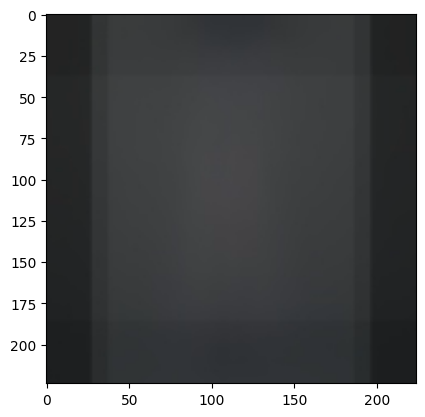

In [ ]:
plt.imshow(mean_img)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.3, 1.5),
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=sub_mean_image
)

val_datagen = ImageDataGenerator(
    preprocessing_function=sub_mean_image)

In [ ]:
batch_size = 32
resize_vol = 224
train_generator = train_datagen.flow_from_directory(f'/content/drive/MyDrive/dataset_masked120/train',batch_size=batch_size, target_size=(resize_vol, resize_vol))
val_generator = val_datagen.flow_from_directory(f'/content/drive/MyDrive/dataset_masked120/val', batch_size=batch_size, target_size = (resize_vol, resize_vol))

Found 26853 images belonging to 23 classes.
Found 2996 images belonging to 23 classes.


In [ ]:
import math

def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 7.0
   lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
   return lrate

lrate = LearningRateScheduler(step_decay)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15 ,restore_best_weights=True,start_from_epoch=5)

In [ ]:
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')
base_model.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
outputs = tf.keras.layers.Dense(23, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
# categorical_crossentropy
model.compile(optimizer = tf.keras.optimizers.AdamW(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 fitting
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples // batch_size,
                    batch_size=batch_size,
                    validation_steps = val_generator.samples // batch_size,
                    validation_data=val_generator,
                    epochs=300,
                    callbacks=[lrate, es])
history

Epoch 1/300
839/839 [==============================] - 385s 446ms/step - loss: 402.8004 - accuracy: 0.0975 - val_loss: 465.6291 - val_accuracy: 0.1176 - lr: 0.0100
Epoch 2/300
839/839 [==============================] - 373s 445ms/step - loss: 456.8568 - accuracy: 0.1224 - val_loss: 481.7486 - val_accuracy: 0.1334 - lr: 0.0100
Epoch 3/300
839/839 [==============================] - 373s 444ms/step - loss: 464.0287 - accuracy: 0.1338 - val_loss: 496.7072 - val_accuracy: 0.1462 - lr: 0.0100
Epoch 4/300
839/839 [==============================] - 374s 446ms/step - loss: 468.6612 - accuracy: 0.1452 - val_loss: 518.5932 - val_accuracy: 0.1462 - lr: 0.0100
Epoch 5/300
839/839 [==============================] - 376s 448ms/step - loss: 475.7898 - accuracy: 0.1523 - val_loss: 523.6553 - val_accuracy: 0.1583 - lr: 0.0100
Epoch 6/300
839/839 [==============================] - 375s 446ms/step - loss: 476.7350 - accuracy: 0.1570 - val_loss: 544.3668 - val_accuracy: 0.1394 - lr: 0.0100
Epoch 7/300
839/

UnknownError: ignored